# New

## metaphlan

In [35]:
metaphlan_bowtie = pd.read_csv("../../results/MetaPhlAn4/output_merged.csv")
metaphlan_bbmap = process_files("../../results/MetaPhlAn4_bbmap/")

In [30]:
metaphlan_kingdom_bowtie = kingdom_stacked(test_m)

In [37]:
metaphlan_kingdom_bbmap = kingdom_stacked(metaphlan_bbmap)

In [38]:
metaphlan_species_bowtie = create_species_plot(metaphlan_bowtie)

In [39]:
metaphlan_species_bbmap = create_species_plot(metaphlan_bbmap)

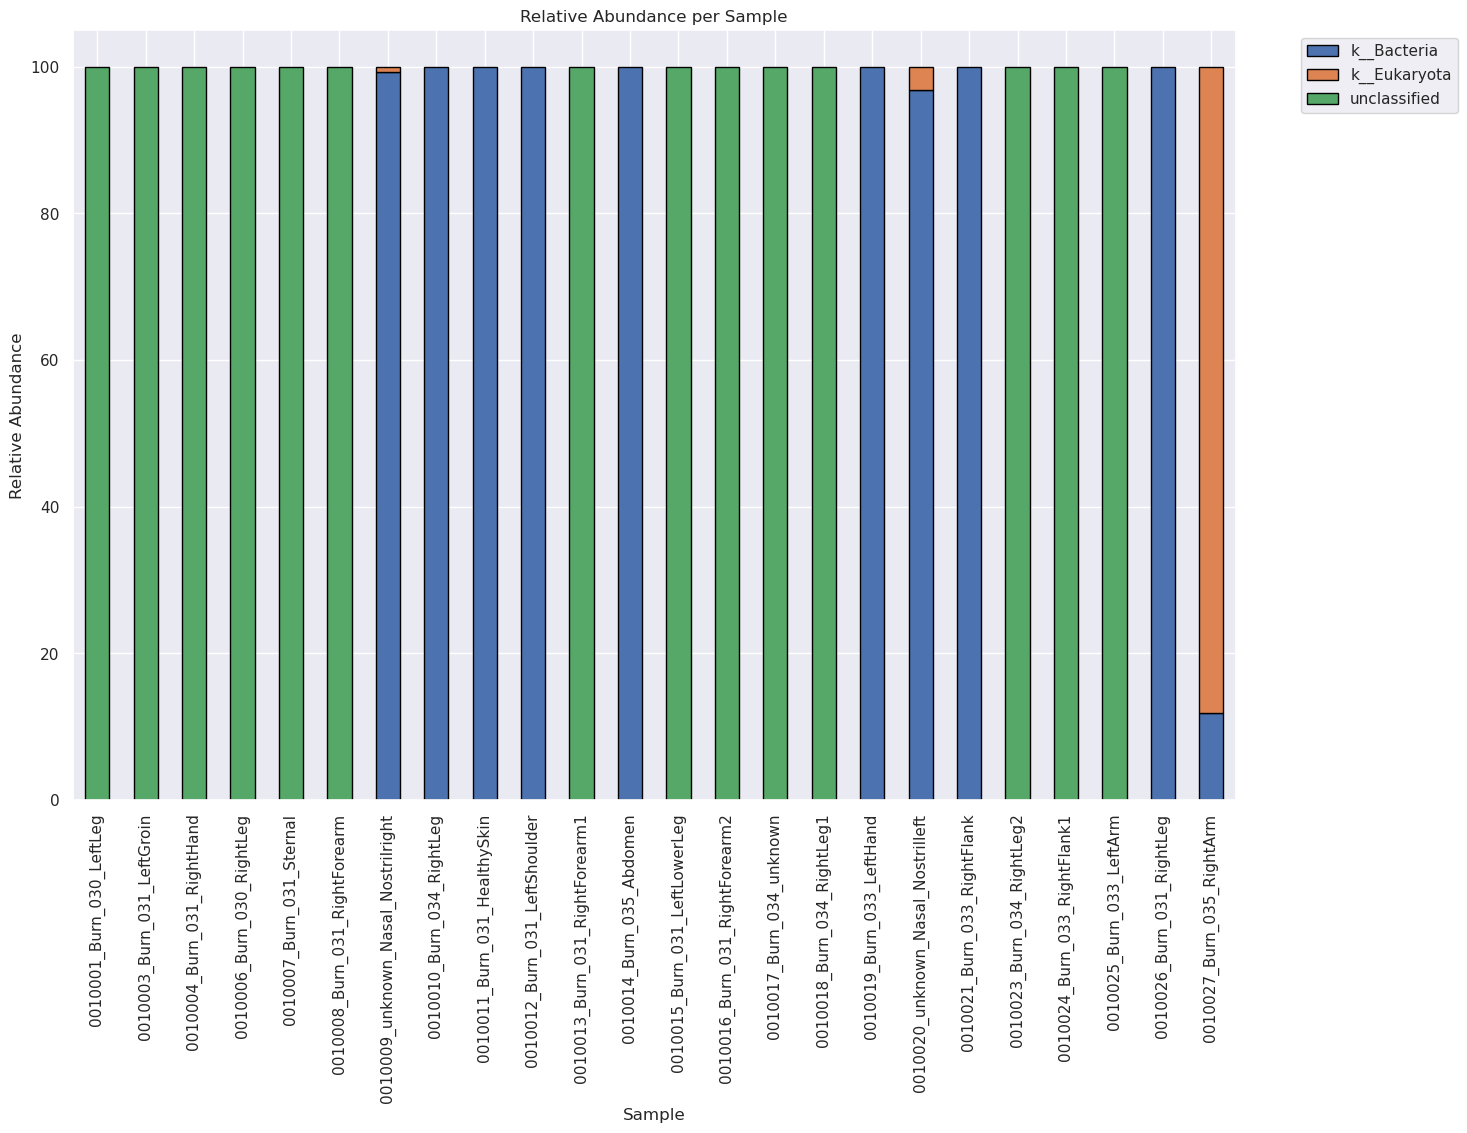

In [31]:
metaphlan_kingdom_bowtie

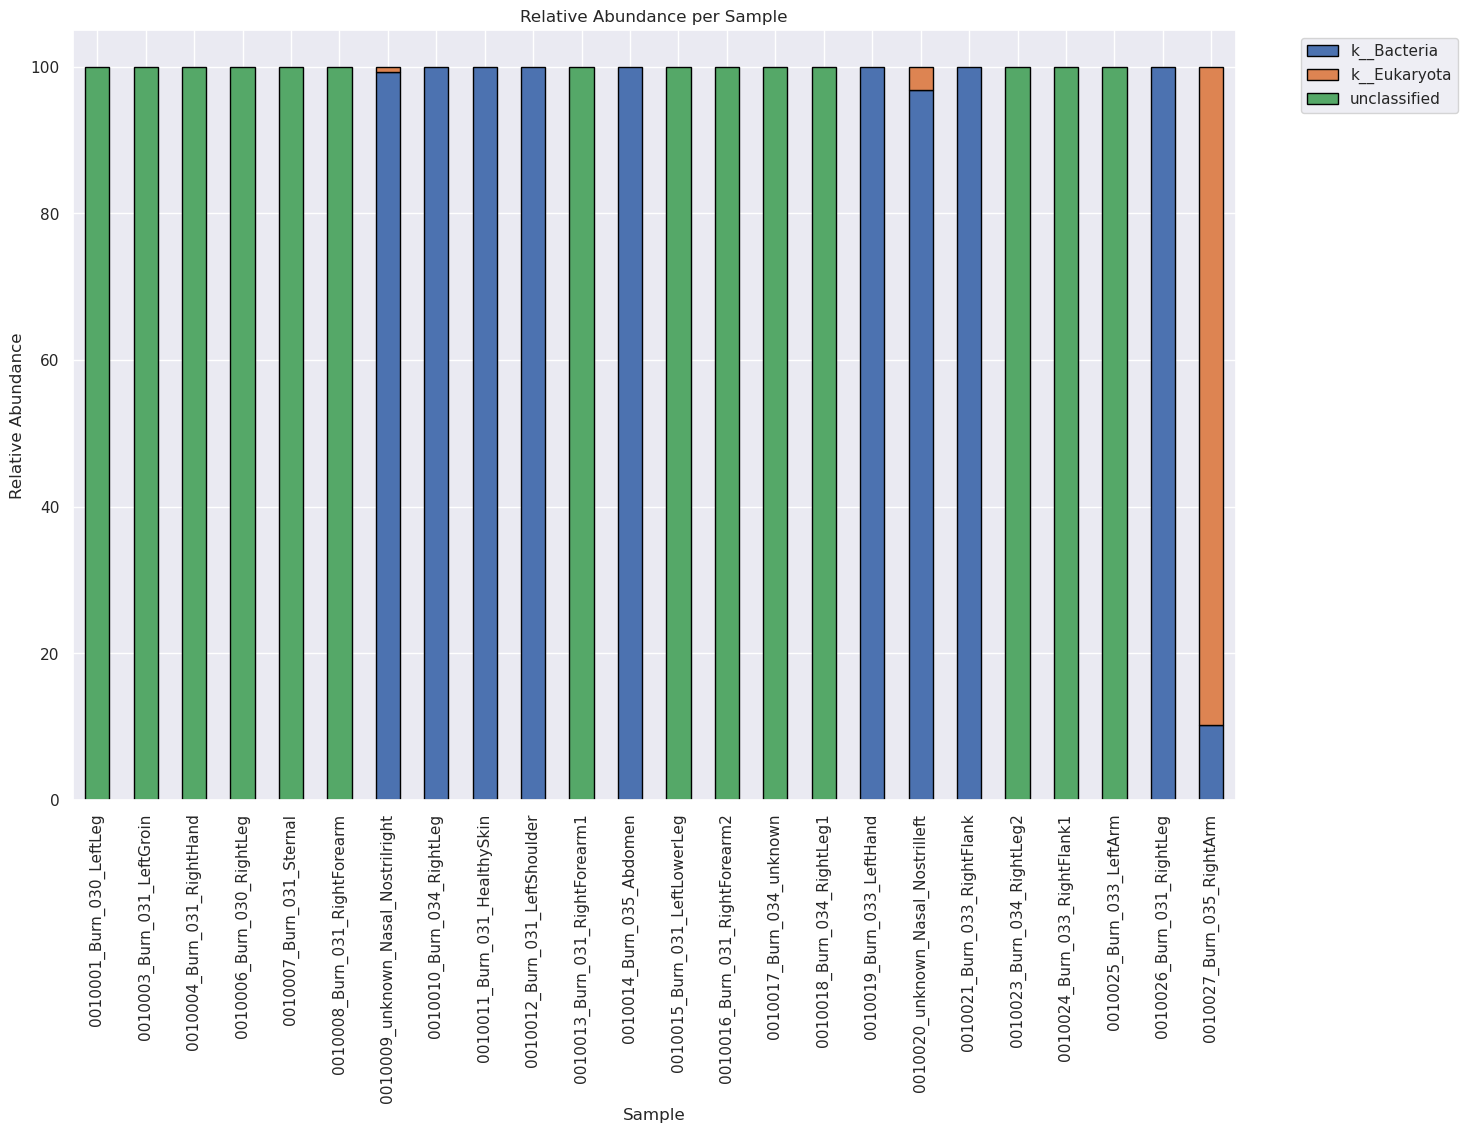

In [41]:
metaphlan_kingdom_bbmap

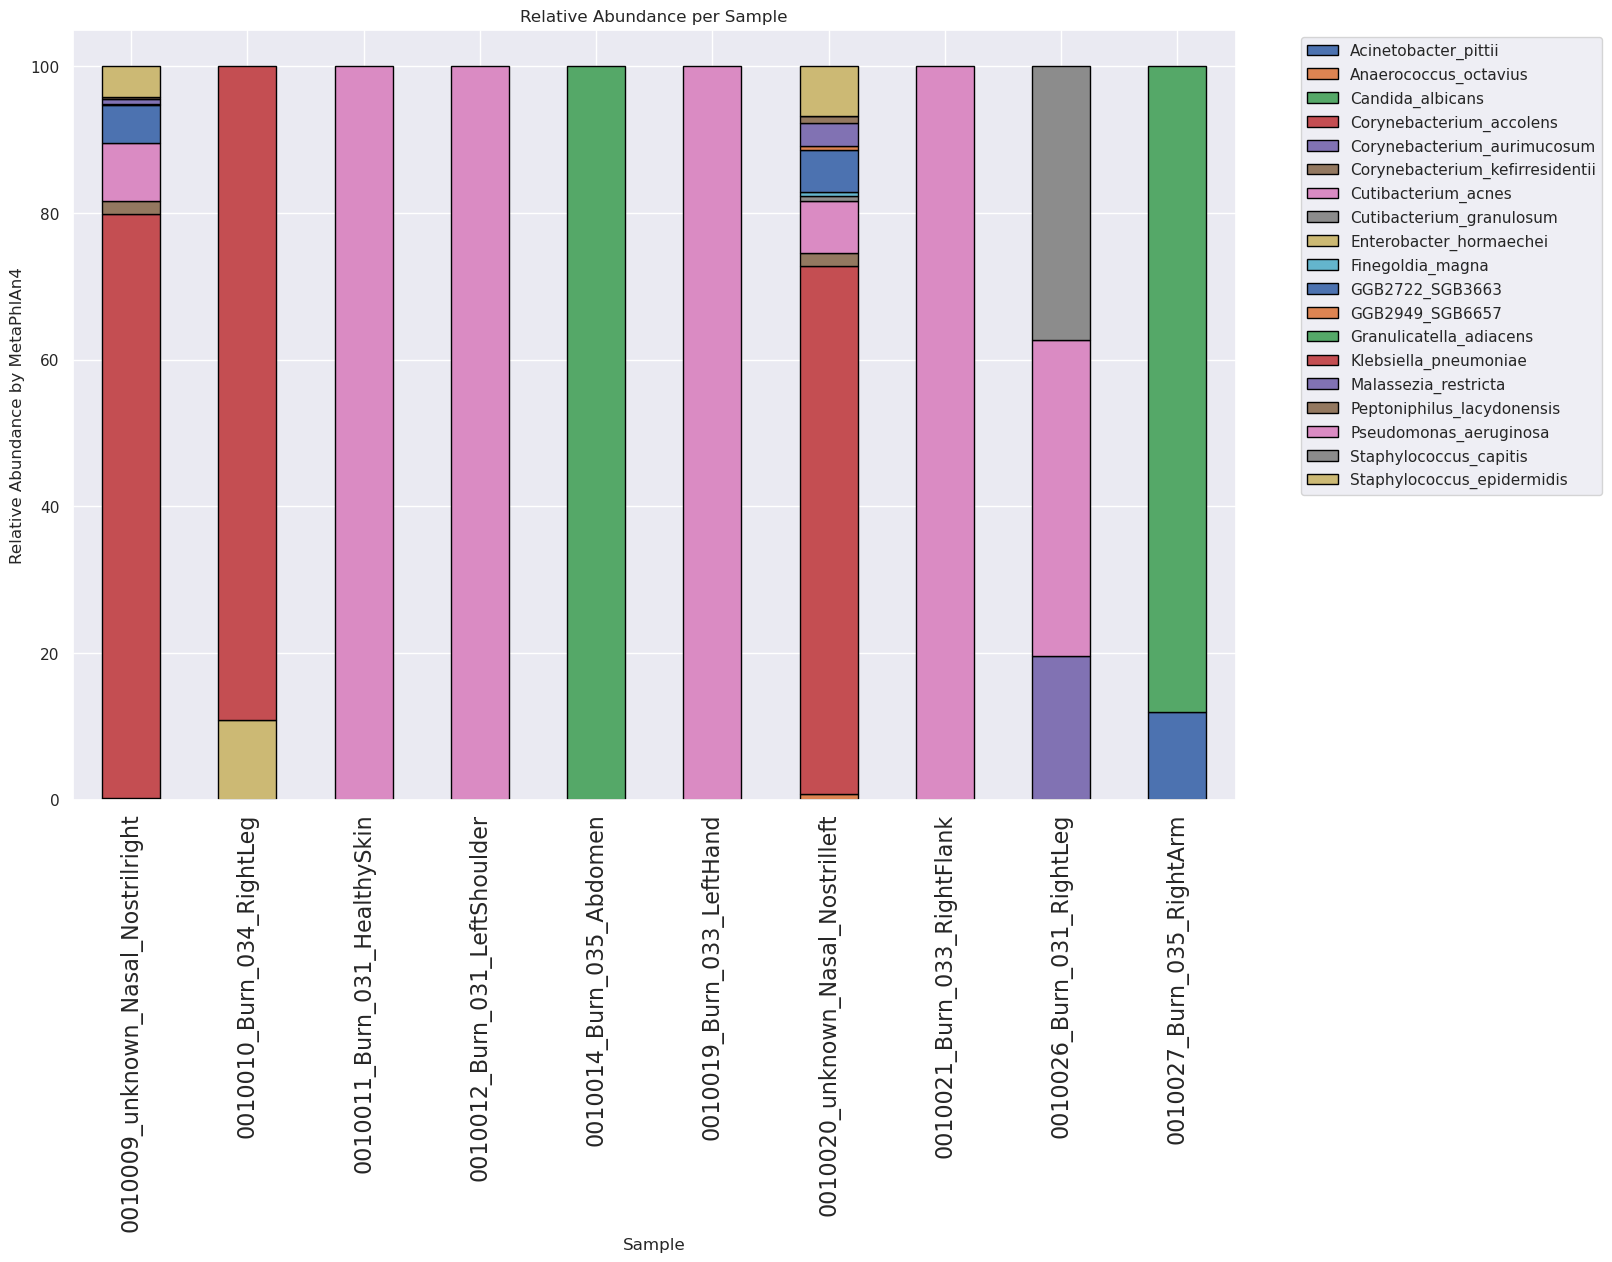

In [42]:
metaphlan_species_bowtie

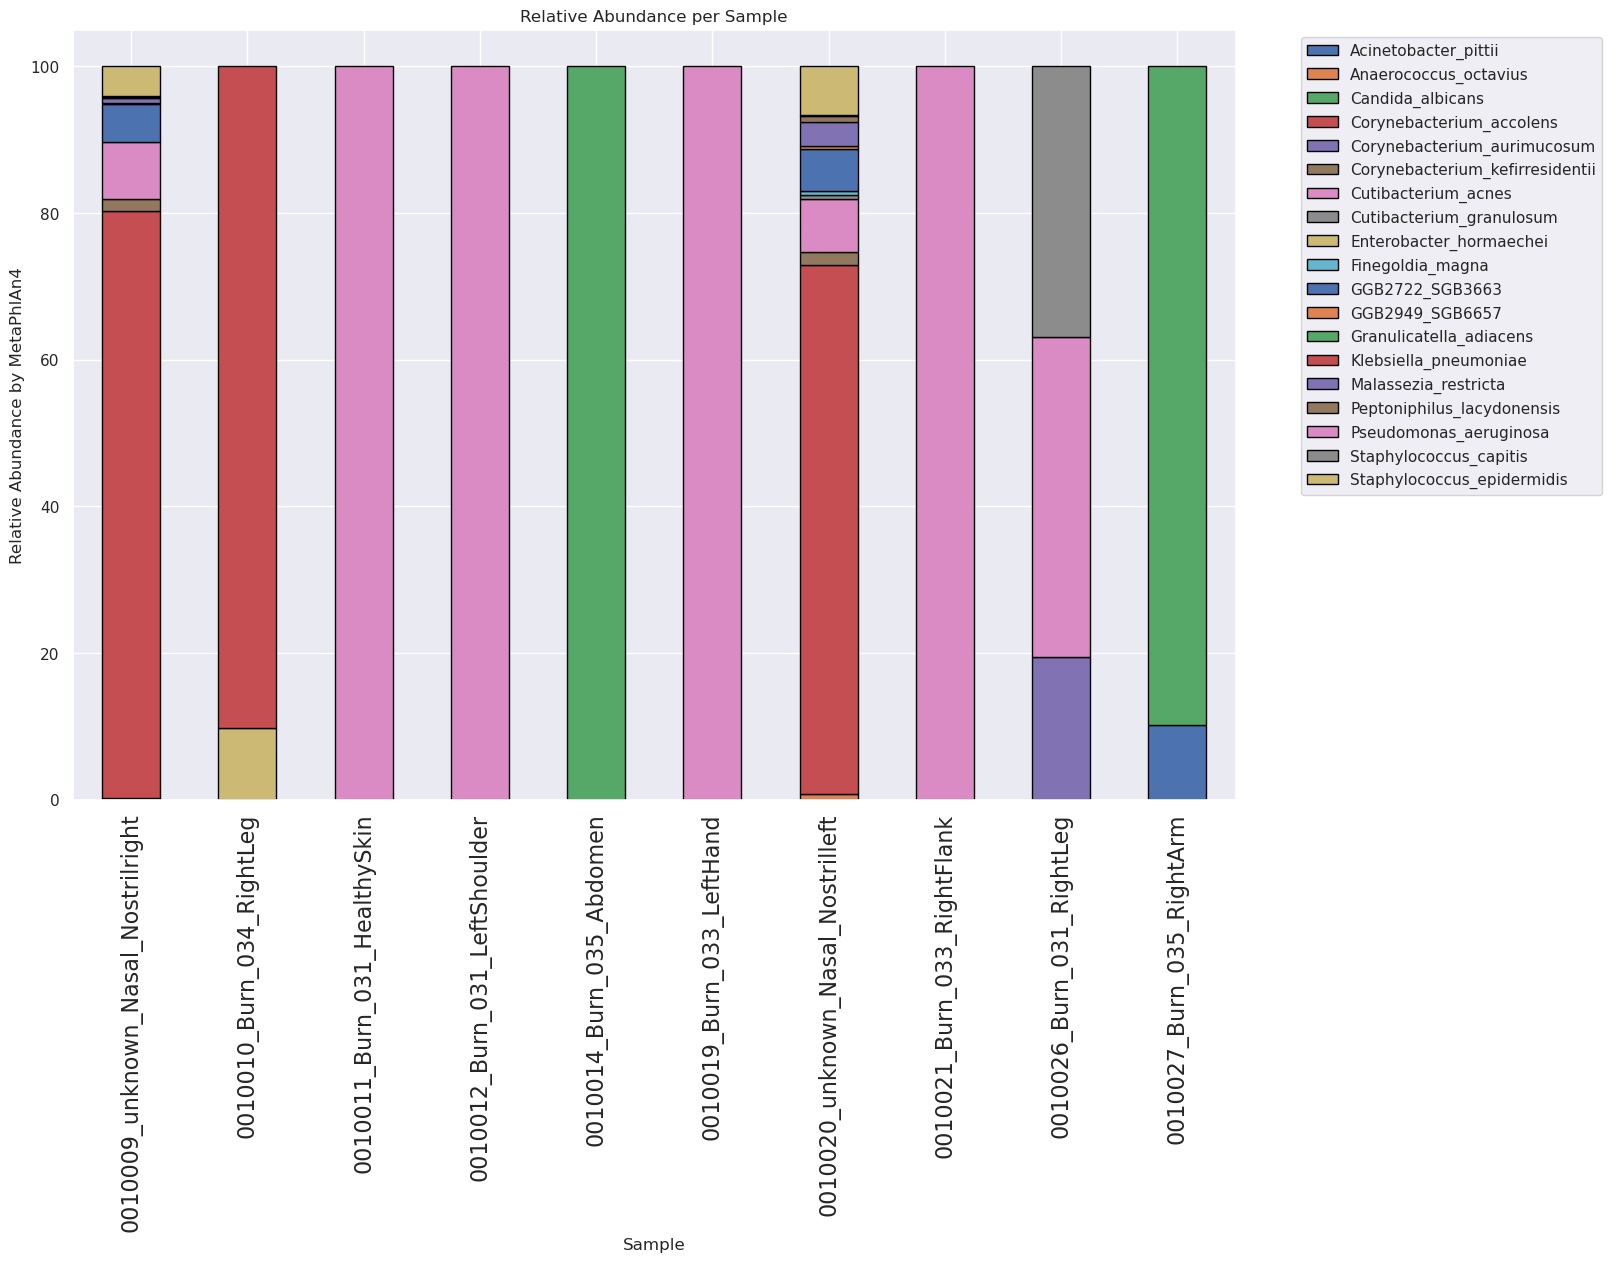

In [43]:
metaphlan_species_bbmap

In [15]:
metaphlan_bowtie.head()

,clade_name,clade_taxid,relative_abundance,coverage,estimated_number_of_reads_from_the_clade,sample
0,unclassified,-1,100.0,0.0,0.0,0010003_Burn_031_LeftGroin
0,unclassified,-1,100.0,0.0,0.0,0010001_Burn_030_LeftLeg
0,unclassified,-1,100.0,0.0,0.0,0010018_Burn_034_RightLeg1
0,unclassified,-1,100.0,0.0,0.0,0010004_Burn_031_RightHand
0,unclassified,-1,100.0,0.0,0.0,0010016_Burn_031_RightForearm2


## kraken

In [32]:
kraken_bowtie = pd.read_csv("../../results/Kraken2/metaphlan_style_reports/kraken2_output_merged.csv")

In [33]:
def kingdom_stacked_kraken(df):
    # Filter the DataFrame
    filtered_df = df[df['clade_name'].isin(['x__unclassified', 'd__Bacteria', 'd__Eukaryota'])]

    # Pivot the DataFrame
    pivot_df = filtered_df.pivot(index='sample', columns='clade_name', values='relative_abundance')

    # Create the plot with 'Accent' colormap
    fig, ax = plt.subplots(figsize=(15, 10))
    pivot_df.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')

    # Set the Seaborn style
    sns.set()

    # Add labels and title
    ax.set_xlabel('Sample')
    ax.set_ylabel('Relative Abundance')
    ax.set_title('Relative Abundance per Sample')

    # Move the legend outside of the figure
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Close the figure
    plt.close()

    return fig

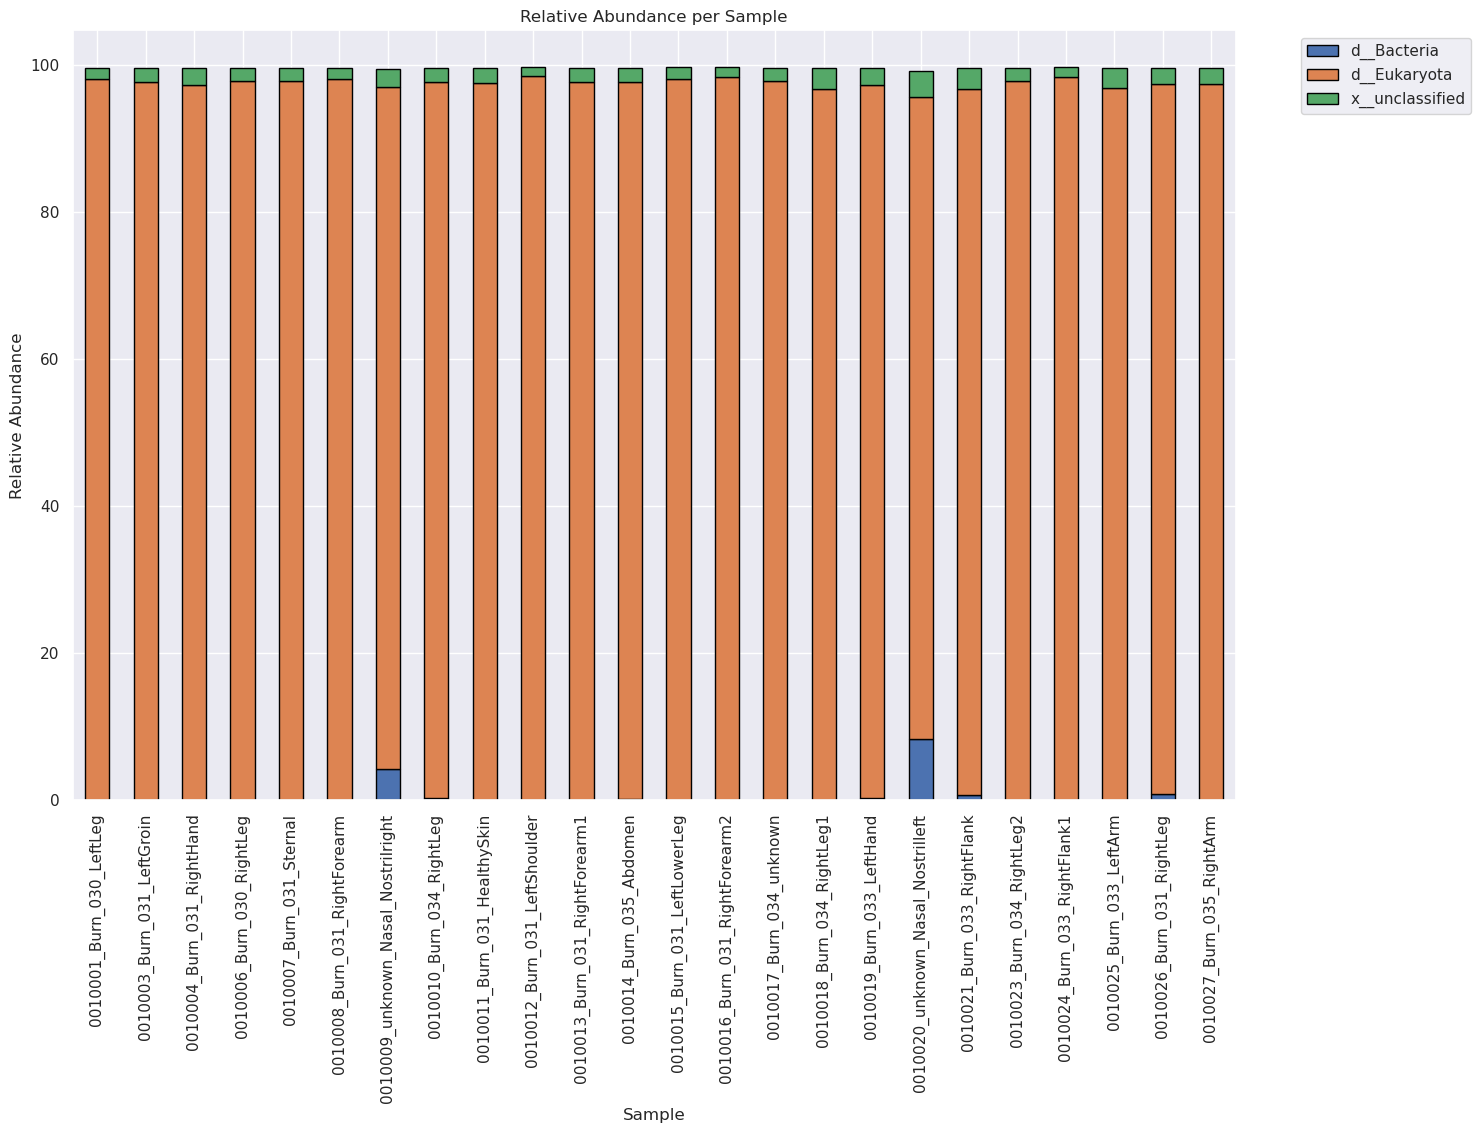

In [34]:
kingdom_stacked_kraken(kraken_bowtie)

In [16]:
kraken_bowtie

,clade_name,estimated_number_of_reads_from_the_clade,relative_abundance,sample
0,x__unclassified,220170,2.89,0010018_Burn_034_RightLeg1
1,r__root,7398610,97.11,0010018_Burn_034_RightLeg1
2,x__cellular_organisms,7396414,97.08,0010018_Burn_034_RightLeg1
3,d__Eukaryota,7367426,96.70,0010018_Burn_034_RightLeg1
4,x__Opisthokonta,7205219,94.57,0010018_Burn_034_RightLeg1
...,...,...,...,...
288,d__Viruses|k__Pararnavirae|p__Artverviricota|c...,6,0.00,0010006_Burn_030_RightLeg
289,d__Viruses|k__Pararnavirae|p__Artverviricota|c...,2,0.00,0010006_Burn_030_RightLeg
290,x__unclassified_Gammaretrovirus,1,0.00,0010006_Burn_030_RightLeg
291,d__Viruses|k__Pararnavirae|p__Artverviricota|c...,1,0.00,0010006_Burn_030_RightLeg


In [17]:
filtered_kraken = kraken_bowtie[kraken_bowtie["estimated_number_of_reads_from_the_clade"] >= 10]
filtered_kraken = filtered_kraken[filtered_kraken["clade_name"].str.contains("d__Bacteria") & filtered_kraken["clade_name"].str.contains("s__")]
filtered_kraken.loc[:, 'clade_name'] = filtered_kraken['clade_name'].str.split('s__').str[-1]
filtered_kraken = filtered_kraken.pivot(index = 'sample', columns = 'clade_name', values = 'relative_abundance')
filtered_kraken.replace(0.0, np.nan, inplace=True)
thresh = int(0.1 * len(filtered_kraken))
filtered_kraken.dropna(thresh=thresh, axis=1, inplace=True)
filtered_kraken

clade_name,Corynebacterium_accolens,Corynebacterium_tuberculostearicum,Cutibacterium_acnes,Cutibacterium_granulosum,Pseudomonas_aeruginosa,Staphylococcus_capitis,Staphylococcus_epidermidis
sample,,,,,,,
0010003_Burn_031_LeftGroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010004_Burn_031_RightHand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010006_Burn_030_RightLeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010007_Burn_031_Sternal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010008_Burn_031_RightForearm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010009_unknown_Nasal_Nostrilright,0.88,0.01,0.29,0.01,NaN,0.02,0.18
0010010_Burn_034_RightLeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010011_Burn_031_HealthySkin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010012_Burn_031_LeftShoulder,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
filtered_kraken = kraken_bowtie[kraken_bowtie["estimated_number_of_reads_from_the_clade"] >= 10]
filtered_kraken = filtered_kraken[filtered_kraken["clade_name"].str.contains("d__Bacteria") & filtered_kraken["clade_name"].str.contains("s__")]
filtered_kraken.loc[:, 'clade_name'] = filtered_kraken['clade_name'].str.split('s__').str[-1]
filtered_kraken = filtered_kraken.pivot(index = 'sample', columns = 'clade_name', values = 'relative_abundance')
filtered_kraken.replace(0.0, np.nan, inplace=True)
thresh = int(0.1 * len(filtered_kraken))
filtered_kraken.dropna(thresh=thresh, axis=1, inplace=True)


thresh = int(0.1 * len(filtered_kraken))
filtered_kraken.dropna(thresh=thresh, axis=1, inplace=True)
filtered_kraken_filled = filtered_kraken[filtered_kraken.sum(axis=1) != 0]
filtered_kraken_filled = filtered_kraken_filled.div(filtered_kraken_filled.sum(axis=1), axis=0).multiply(100)

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(15, 10))
filtered_kraken_filled.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')

# Set the Seaborn style
sns.set()

# Add labels and title
ax.set_xlabel('Sample')
ax.set_ylabel('Relative Abundance by MetaPhlAn4')
ax.set_title('Relative Abundance per Sample')

# Move the legend outside of the figure
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', labelsize=16)

plt.show()

clade_name,Corynebacterium_accolens,Corynebacterium_tuberculostearicum,Cutibacterium_acnes,Cutibacterium_granulosum,Pseudomonas_aeruginosa,Staphylococcus_capitis,Staphylococcus_epidermidis
sample,,,,,,,
0010009_unknown_Nasal_Nostrilright,63.309353,0.719424,20.863309,0.719424,NaN,1.438849,12.949640
0010016_Burn_031_RightForearm2,NaN,NaN,NaN,NaN,NaN,100.000000,NaN
0010019_Burn_033_LeftHand,NaN,NaN,NaN,NaN,50.000000,NaN,50.000000
0010020_unknown_Nasal_Nostrilleft,62.745098,0.980392,17.973856,1.307190,NaN,0.653595,16.339869
0010021_Burn_033_RightFlank,NaN,NaN,NaN,NaN,100.000000,NaN,NaN
0010026_Burn_031_RightLeg,NaN,34.615385,NaN,NaN,3.846154,57.692308,3.846154


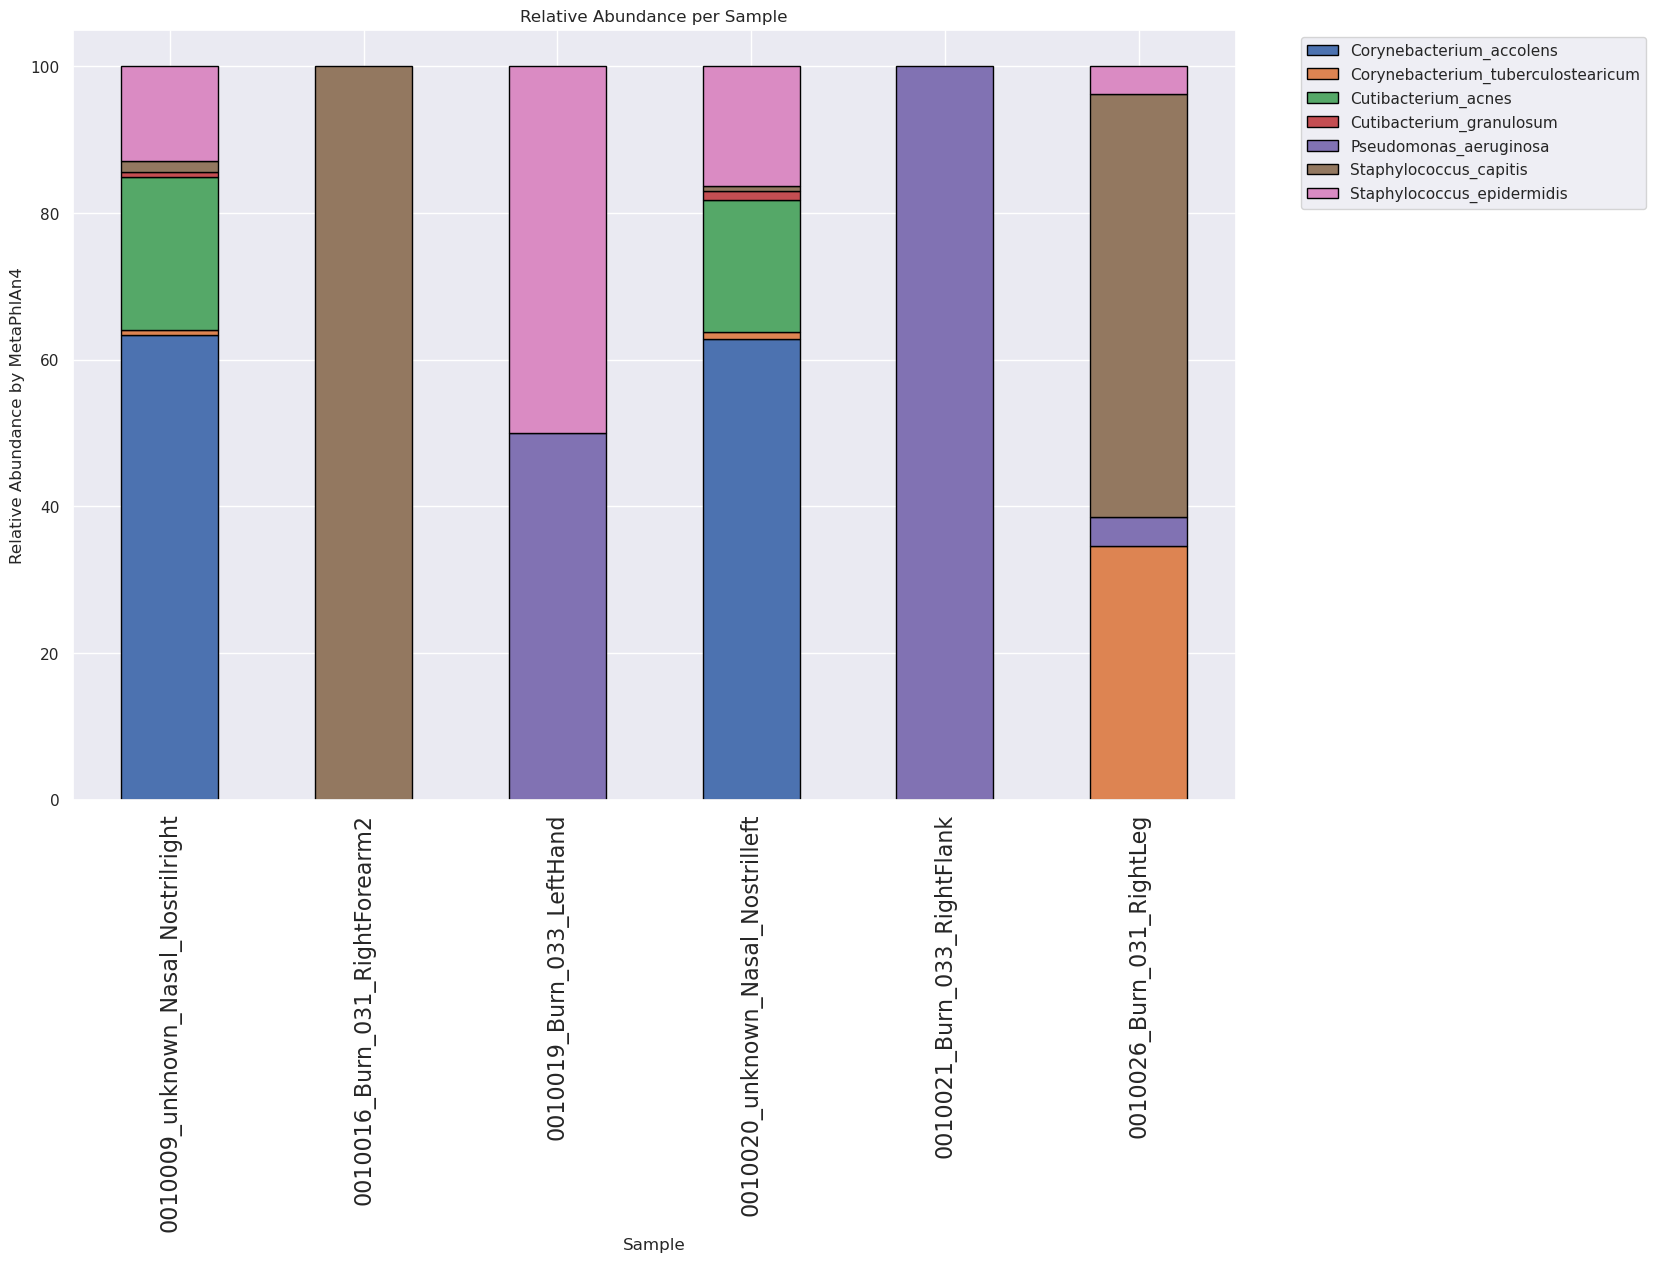

In [19]:
# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(15, 10))
filtered_kraken_filled.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')

# Set the Seaborn style
sns.set()

# Add labels and title
ax.set_xlabel('Sample')
ax.set_ylabel('Relative Abundance by MetaPhlAn4')
ax.set_title('Relative Abundance per Sample')

# Move the legend outside of the figure
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', labelsize=16)

plt.show()

## Kraken2

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
kraken2_bowtie = pd.read_csv("../../results/Kraken2/metaphlan_style_reports/kraken2_output_merged.csv")
kraken2_bowtie

,sample,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species,relative_abundance,estimated_number_of_reads_from_the_clade
0,0010018_Burn_034_RightLeg1,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.89,220170
1,0010018_Burn_034_RightLeg1,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.11,7398610
2,0010018_Burn_034_RightLeg1,Eukaryota,Metazoa,NaN,NaN,NaN,NaN,NaN,NaN,97.08,7396414
3,0010018_Burn_034_RightLeg1,Eukaryota,Metazoa,Chordata,NaN,NaN,NaN,NaN,NaN,96.70,7367426
4,0010018_Burn_034_RightLeg1,Eukaryota,Metazoa,Chordata,Mammalia,NaN,NaN,NaN,NaN,94.57,7205219
...,...,...,...,...,...,...,...,...,...,...,...
7153,0010006_Burn_030_RightLeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,6
7154,0010006_Burn_030_RightLeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2
7155,0010006_Burn_030_RightLeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1
7156,0010006_Burn_030_RightLeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1


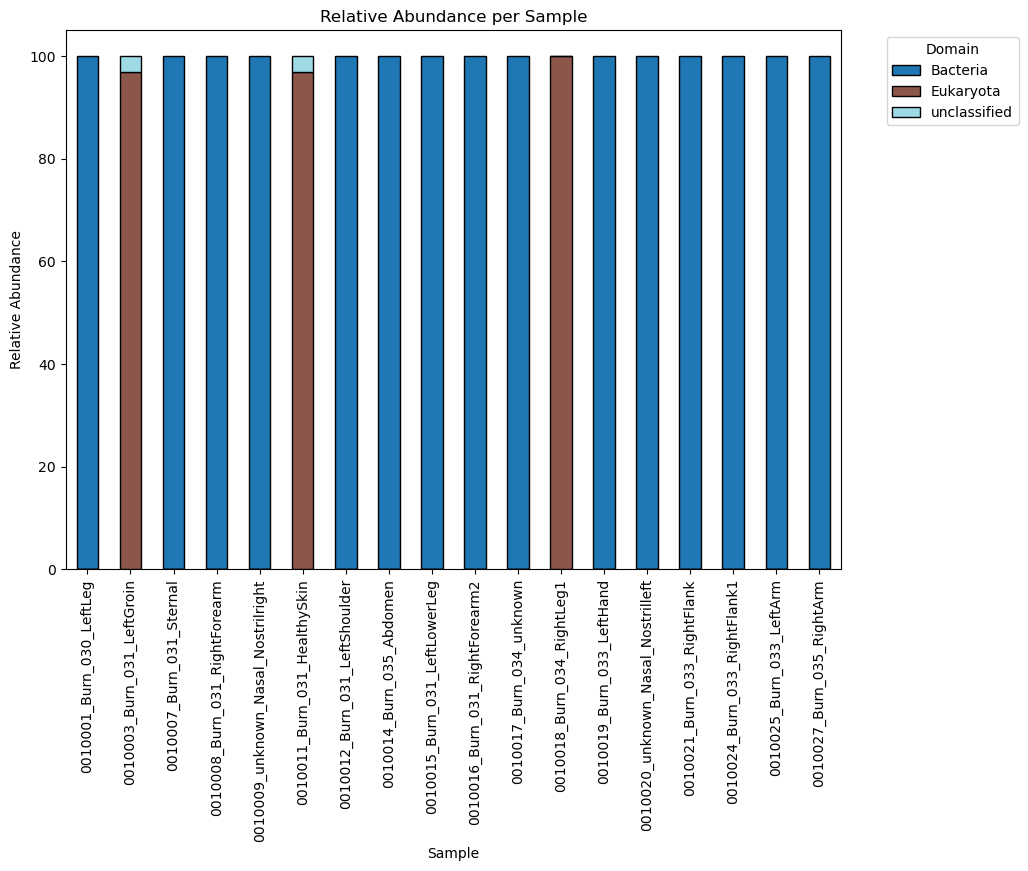

In [12]:
filtered_df = kraken2_bowtie[kraken2_bowtie["Domain"].isin(["Bacteria", "Eukaryota", "unclassified"]) & kraken2_bowtie["Domain"].notnull() & (kraken2_bowtie["estimated_number_of_reads_from_the_clade"] > 10) & (kraken2_bowtie["relative_abundance"] > 0)]
filtered_df = filtered_df.groupby(['sample', "Domain"])['relative_abundance'].sum().reset_index()
filtered_df = filtered_df.pivot(index='sample', columns="Domain", values='relative_abundance')
filtered_df = filtered_df.apply(lambda row: 100. * row / row.sum(), axis=1)
filtered_df = filtered_df.fillna(0)

colormap = plt.get_cmap('tab20', len(filtered_df.columns))

# Plot
filtered_df.plot(kind='bar', stacked=True, figsize=(10,7), edgecolor='black', color=[colormap(i) for i in range(len(filtered_df.columns))])
plt.title('Relative Abundance per Sample')
plt.xlabel('Sample')
plt.ylabel('Relative Abundance')
plt.legend(title="Domain", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [17]:
def plot_relative_abundance_bacteria(df, column, min_reads):
    filtered_df = df[(df["Domain"] == "Bacteria") & (df[column].notnull()) & (df["estimated_number_of_reads_from_the_clade"] > min_reads) & (df["relative_abundance"] > 0)]
    # Aggregate the data
    filtered_df = filtered_df.groupby(['sample', column])['relative_abundance'].sum().reset_index()
    filtered_df = filtered_df.pivot(index='sample', columns=column, values='relative_abundance')
    filtered_df = filtered_df.apply(lambda row: 100. * row / row.sum(), axis=1)
    # Fill NaN values with 0
    filtered_df = filtered_df.fillna(0)
    # Create a colormap
    colormap = plt.get_cmap('tab20', len(filtered_df.columns))
    # Plot
    filtered_df.plot(kind='bar', stacked=True, figsize=(10,7), edgecolor='black', color=[colormap(i) for i in range(len(filtered_df.columns))])
    plt.title('Relative Abundance per Sample')
    plt.xlabel('Sample')
    plt.ylabel('Relative Abundance')
    plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

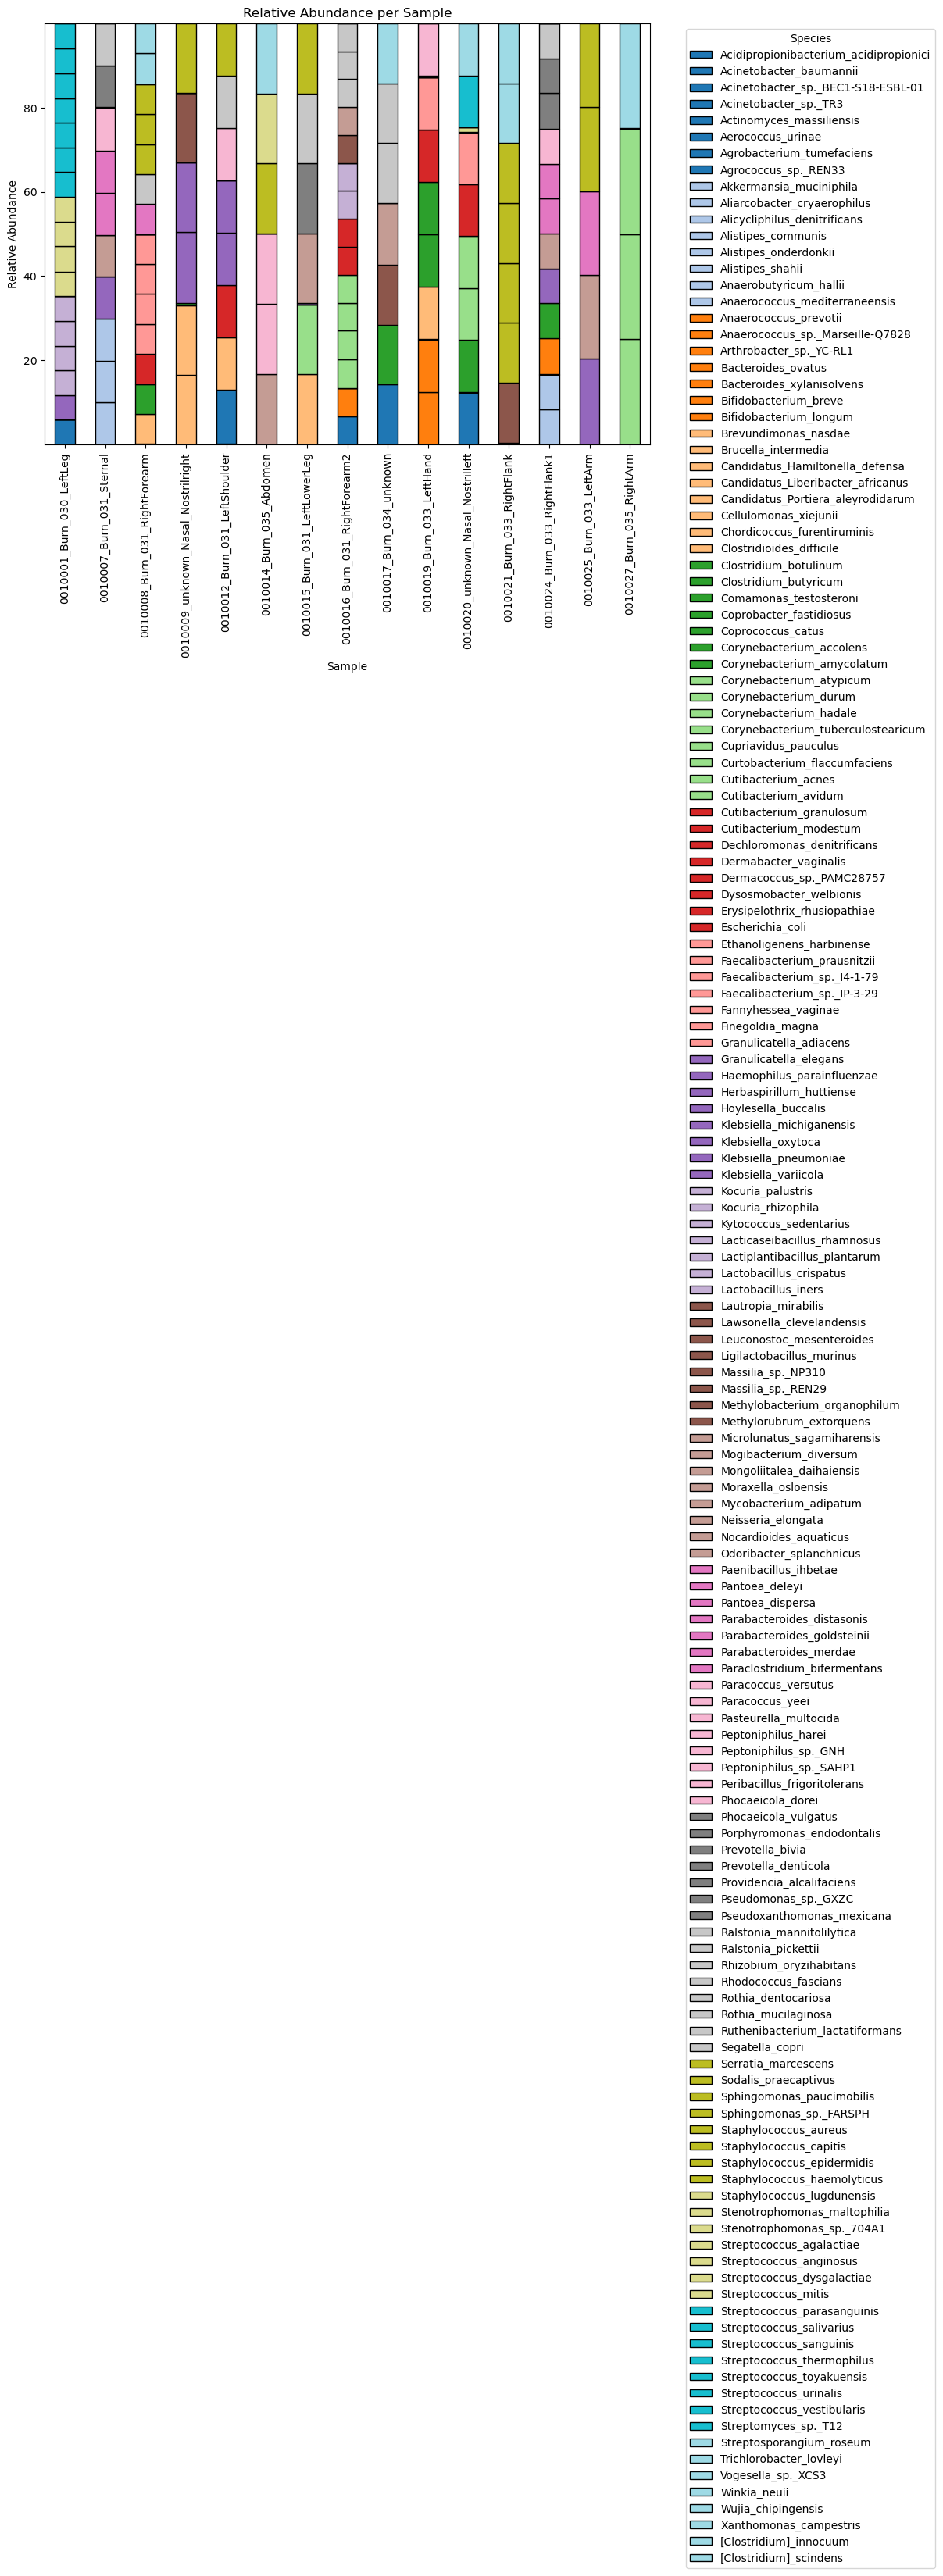

In [18]:
plot_relative_abundance_bacteria(kraken2_bowtie, "Species", 10)

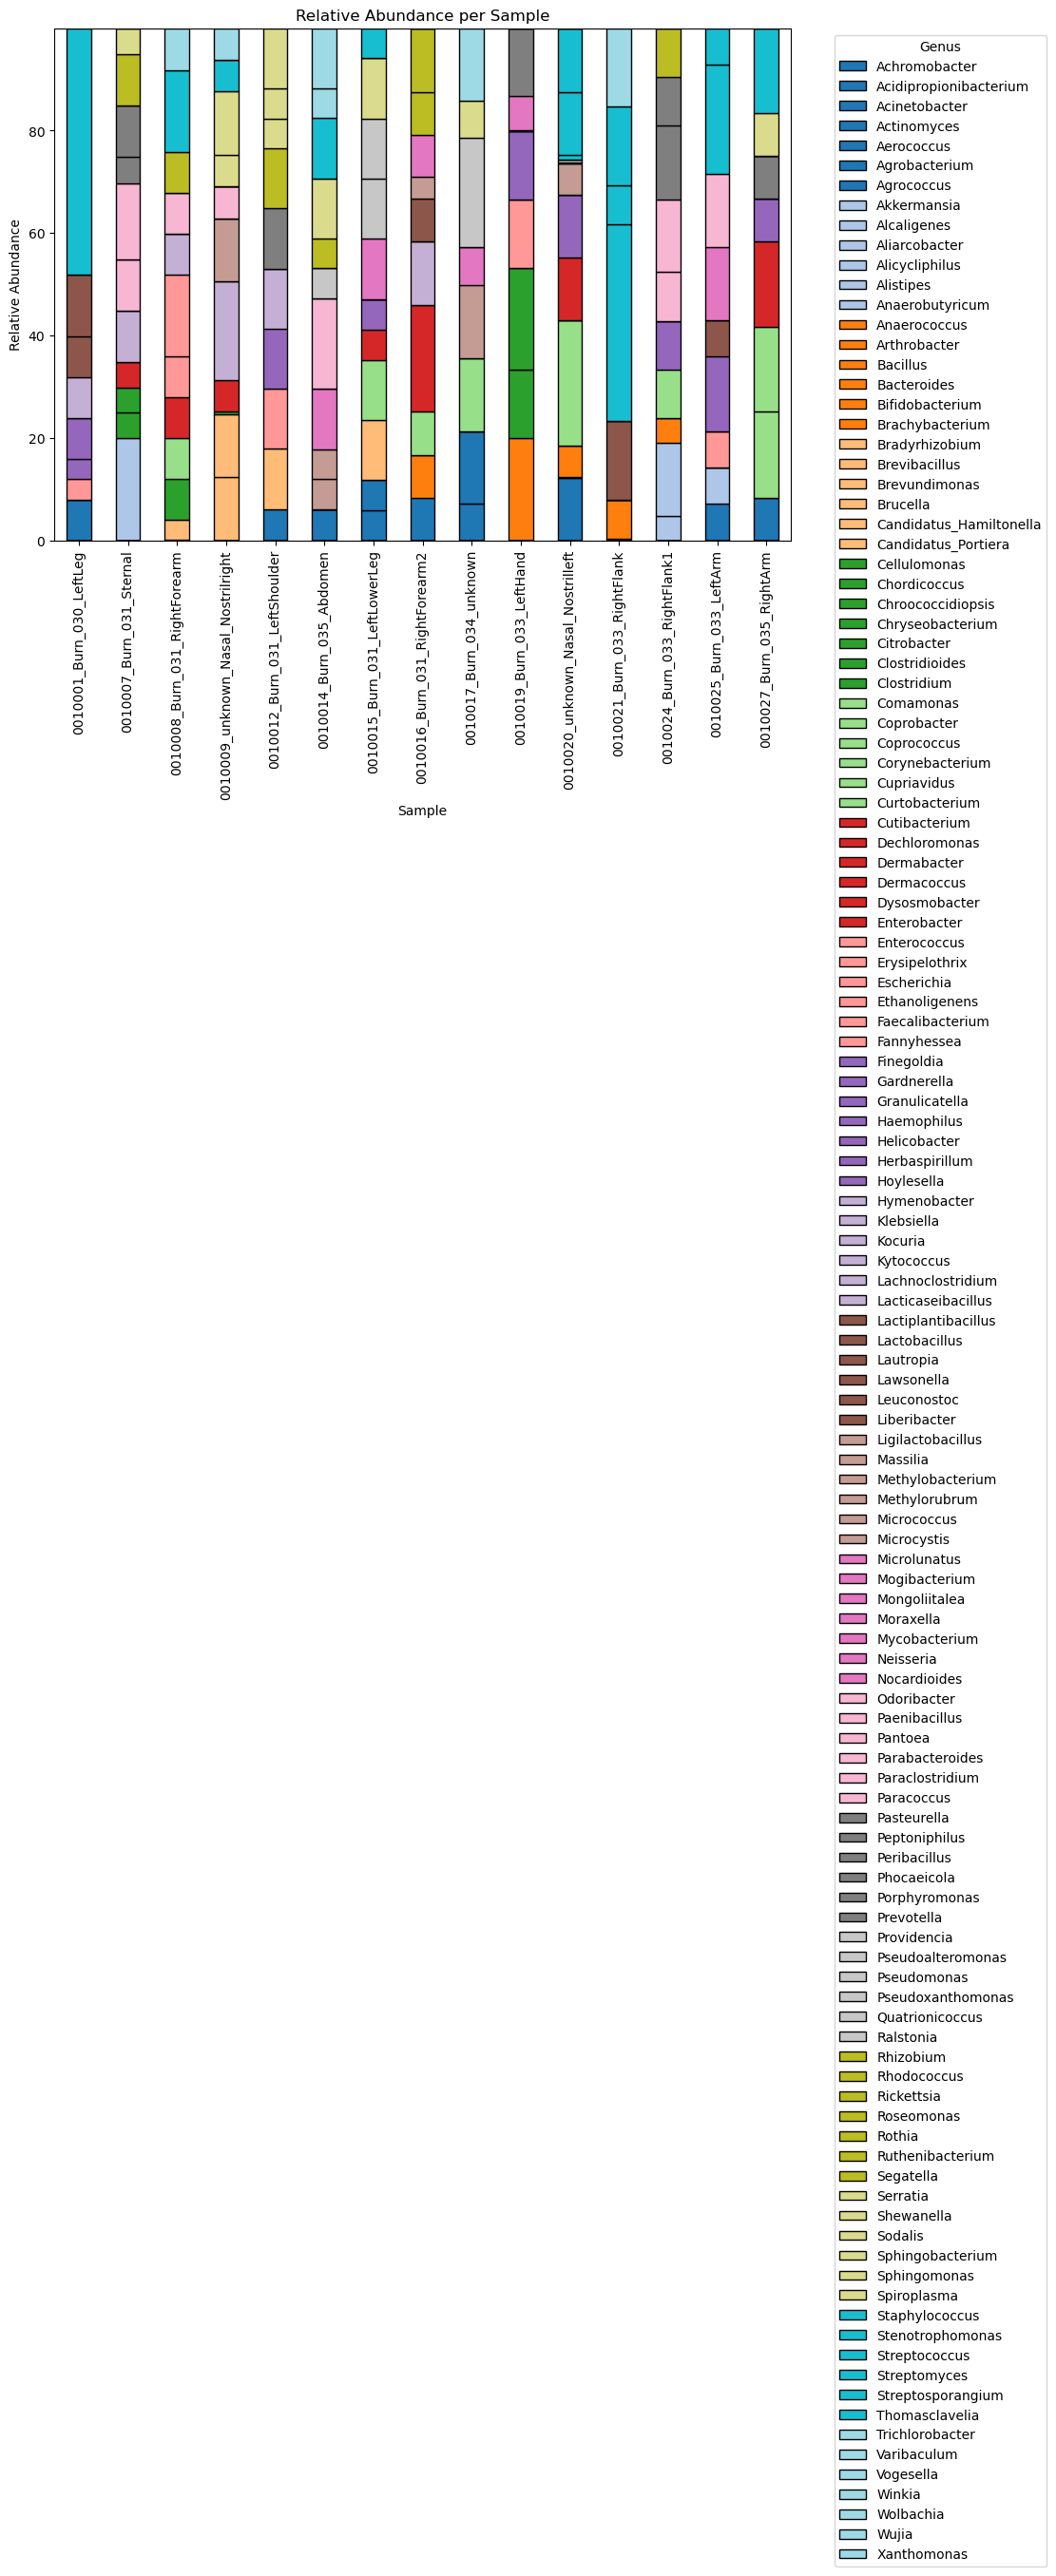

In [19]:
plot_relative_abundance_bacteria(kraken2_bowtie, "Genus", 10)

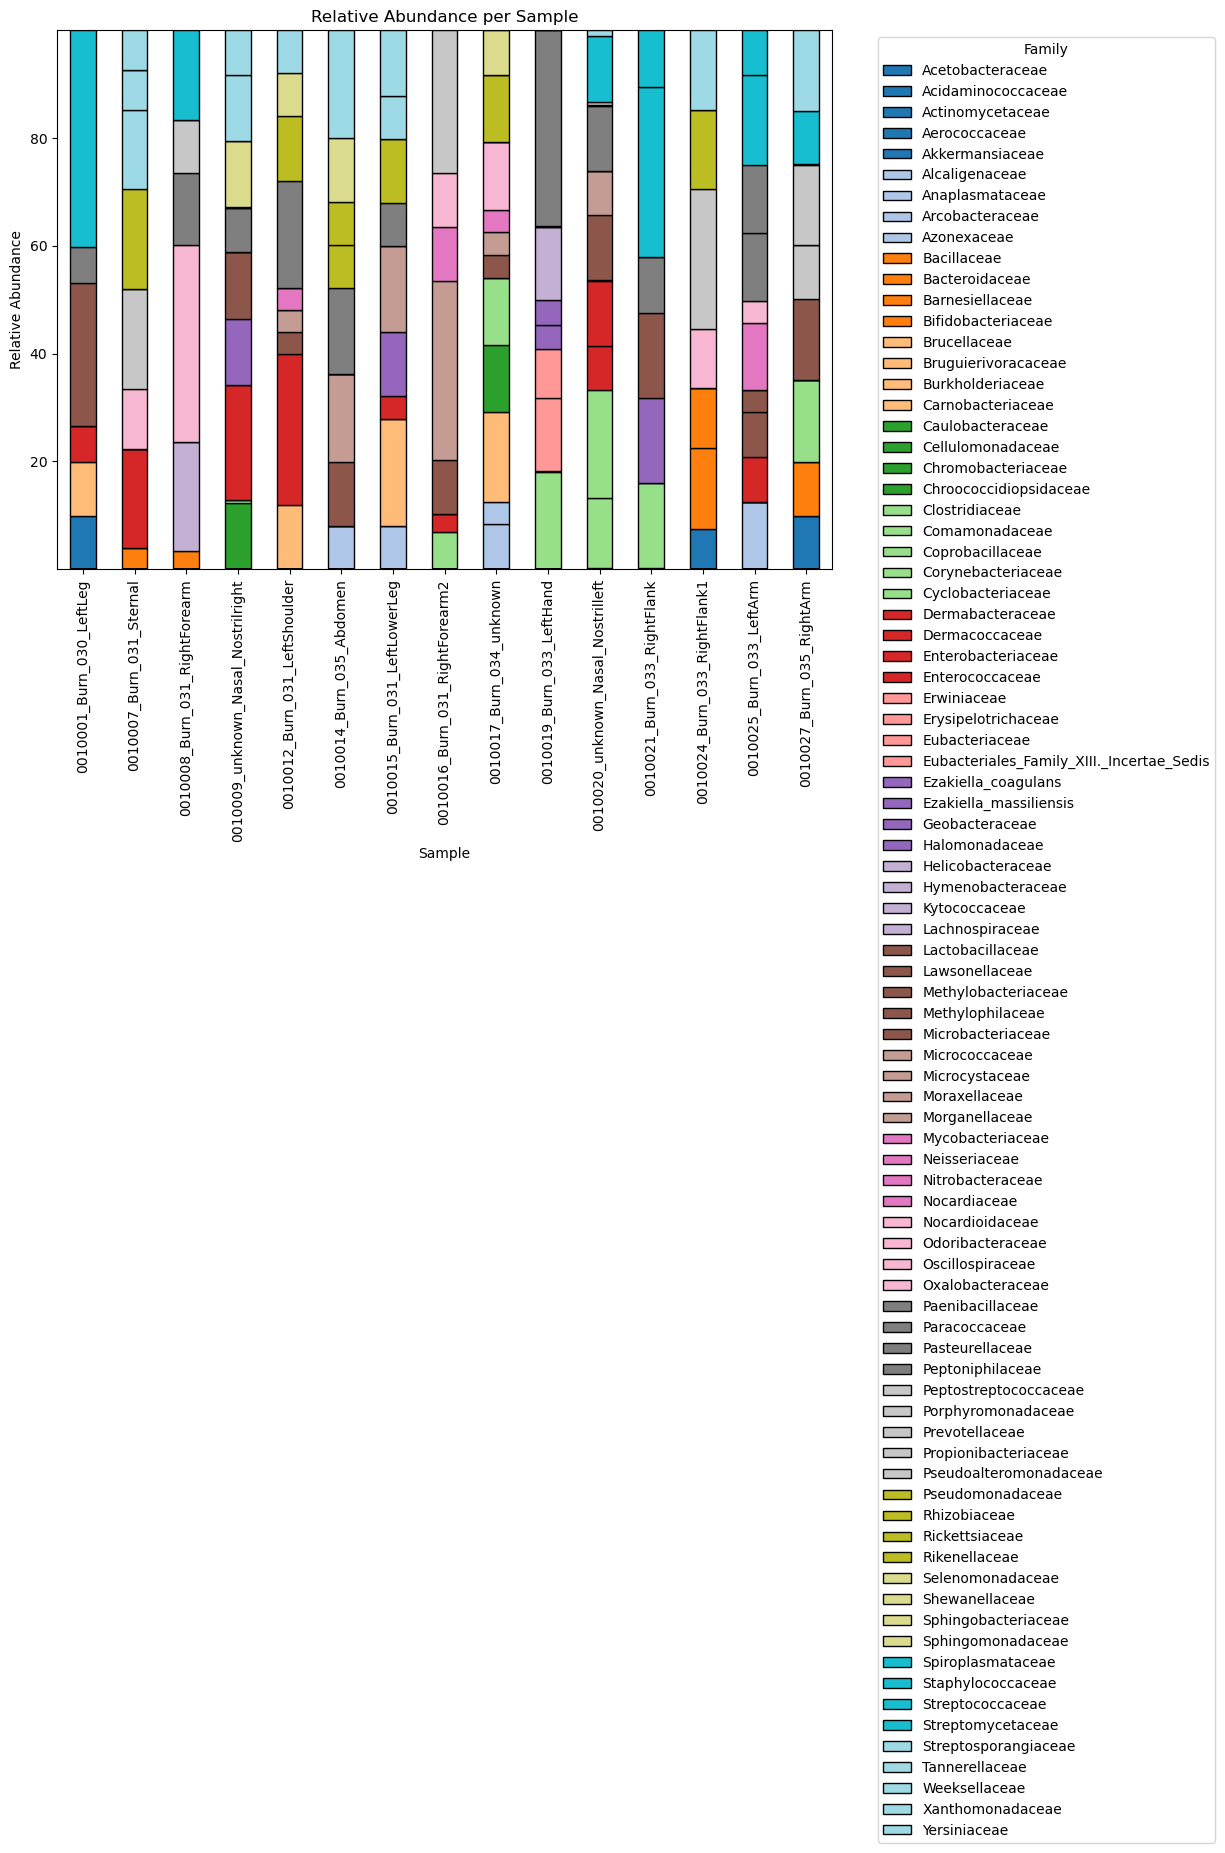

In [20]:
plot_relative_abundance_bacteria(kraken2_bowtie, "Family", 10)

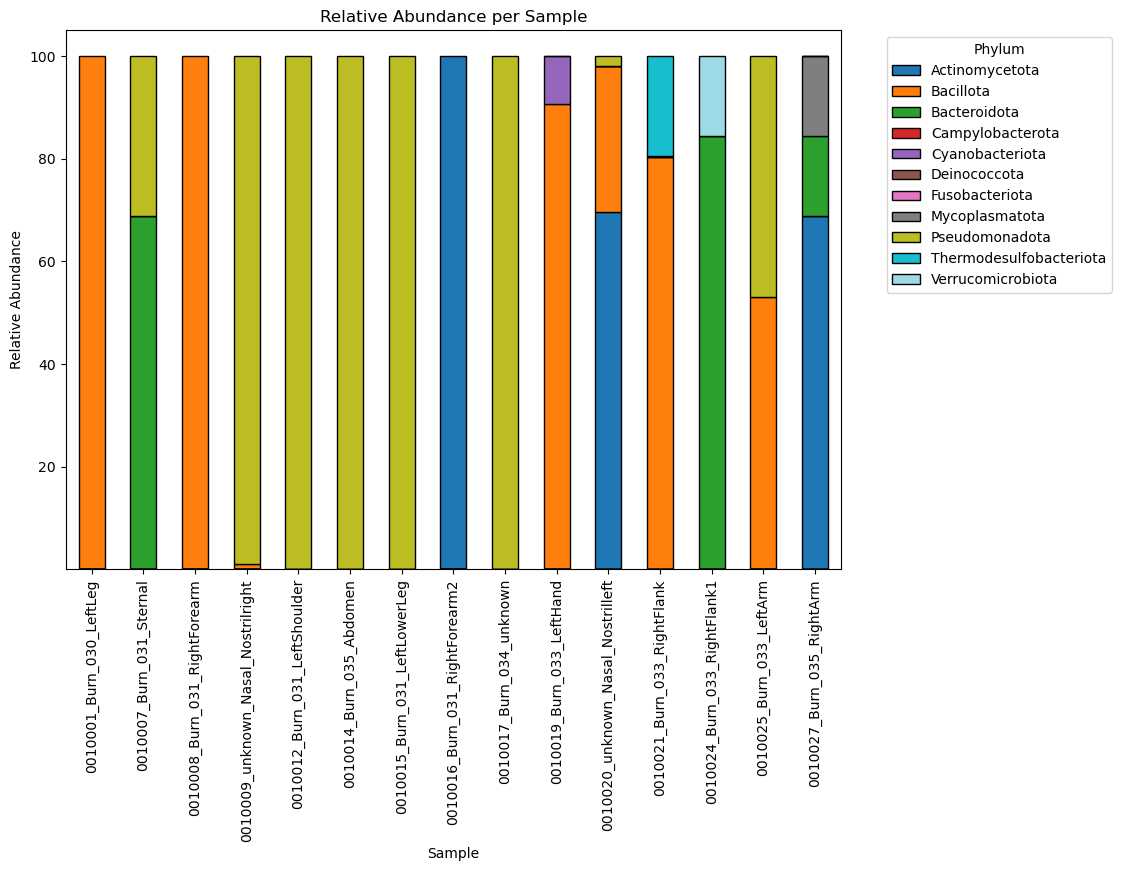

In [25]:
plot_relative_abundance_bacteria(kraken2_bowtie, "Phylum", 10)

Text(0.5, 1.01, 'Species relative abundance (Kraken)')

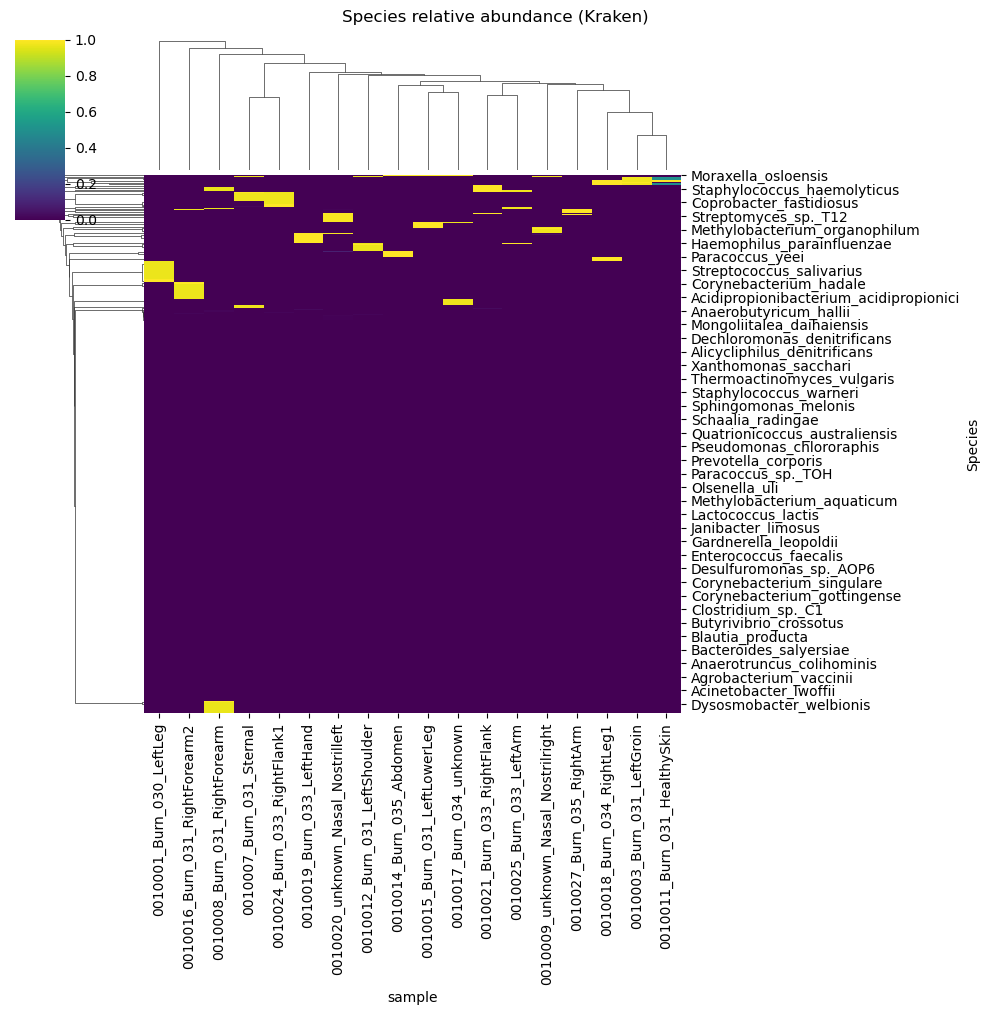

In [21]:
# Pivot the DataFrame
pivot_df = kraken2_bowtie.pivot_table(index='Species', columns='sample', values='relative_abundance', aggfunc='sum')

# Replace NaN values with 0
pivot_df = pivot_df.fillna(0)

# Replace inf and -inf with large finite numbers
pivot_df = pivot_df.replace([np.inf, -np.inf], np.finfo(np.float64).max)

# Create the clustermap
g = sns.clustermap(pivot_df, cmap='viridis', standard_scale=1)

# Add a title
plt.suptitle('Species relative abundance (Kraken)', y=1.01)

ValueError: The condensed distance matrix must contain only finite values.

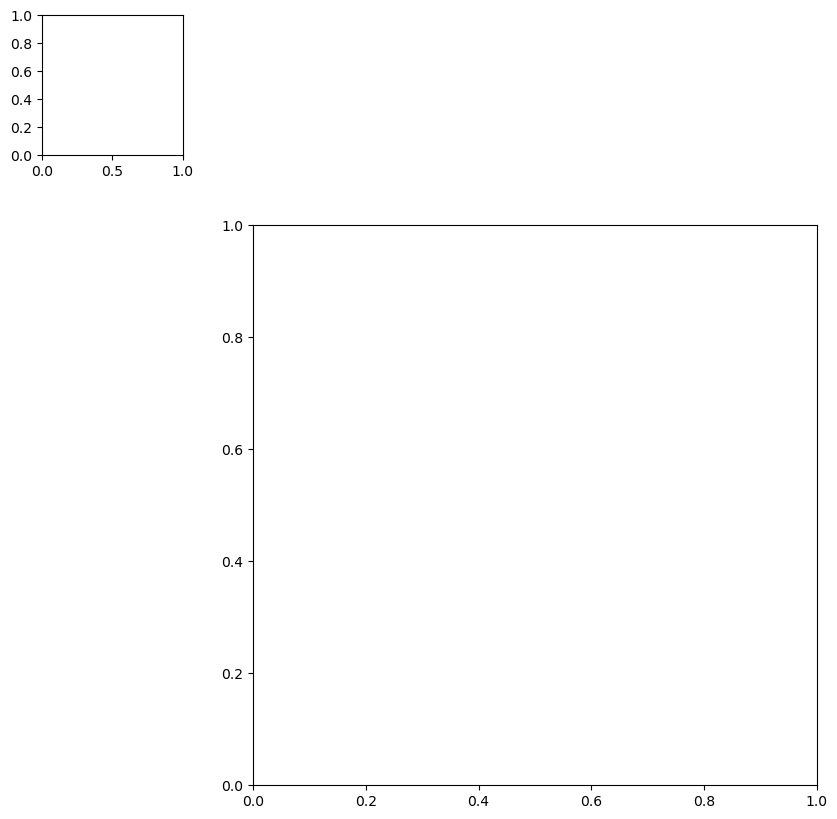

In [29]:
# Pivot the DataFrame
pivot_df = kraken2_bowtie.pivot_table(index='Species', columns='sample', values='relative_abundance', aggfunc='sum')

# Replace NaN values with 0
pivot_df = pivot_df.fillna(0)

# Replace inf and -inf with large finite numbers
pivot_df = pivot_df.replace([np.inf, -np.inf], np.finfo(np.float64).max)

# Sort the DataFrame by the sum of the relative abundances and select the top hits
pivot_df['total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values('total', ascending=False)
top_hits = 10  # number of top hits to display
pivot_df = pivot_df.head(top_hits)
pivot_df = pivot_df.drop(columns='total')

# Replace columns with a standard deviation of 0 with 0
pivot_df.loc[:, pivot_df.std() == 0] = 0

# Create the clustermap
g = sns.clustermap(pivot_df, cmap='viridis', standard_scale=1)

# Add a title
plt.suptitle('Species relative abundance (Kraken)', y=1.01)

## MetaPhlAn2

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
metaphlan_bowtie = pd.read_csv("../../results/MetaPhlAn4/metaphlan_output_merged.csv")
metaphlan_bowtie 

,sample,Kingdom,Phylum,Class,Order,Family,Genus,Species,relative_abundance,estimated_number_of_reads_from_the_clade
0,0010003_Burn_031_LeftGroin,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0
1,0010001_Burn_030_LeftLeg,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0
2,0010018_Burn_034_RightLeg1,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0
3,0010004_Burn_031_RightHand,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0
4,0010016_Burn_031_RightForearm2,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,0
...,...,...,...,...,...,...,...,...,...,...
206,0010020_unknown_Nasal_Nostrilleft,Eukaryota,Basidiomycota,Malasseziomycetes,NaN,NaN,NaN,NaN,0.79795,6706
207,0010020_unknown_Nasal_Nostrilleft,Bacteria,Firmicutes,Tissierellia,NaN,NaN,NaN,NaN,0.61092,5950
208,0010020_unknown_Nasal_Nostrilleft,Bacteria,Firmicutes,CFGB1195,NaN,NaN,NaN,NaN,0.53232,4399
209,0010020_unknown_Nasal_Nostrilleft,Bacteria,Actinobacteria,Actinomycetia,Propionibacteriales,NaN,NaN,NaN,0.47986,3659


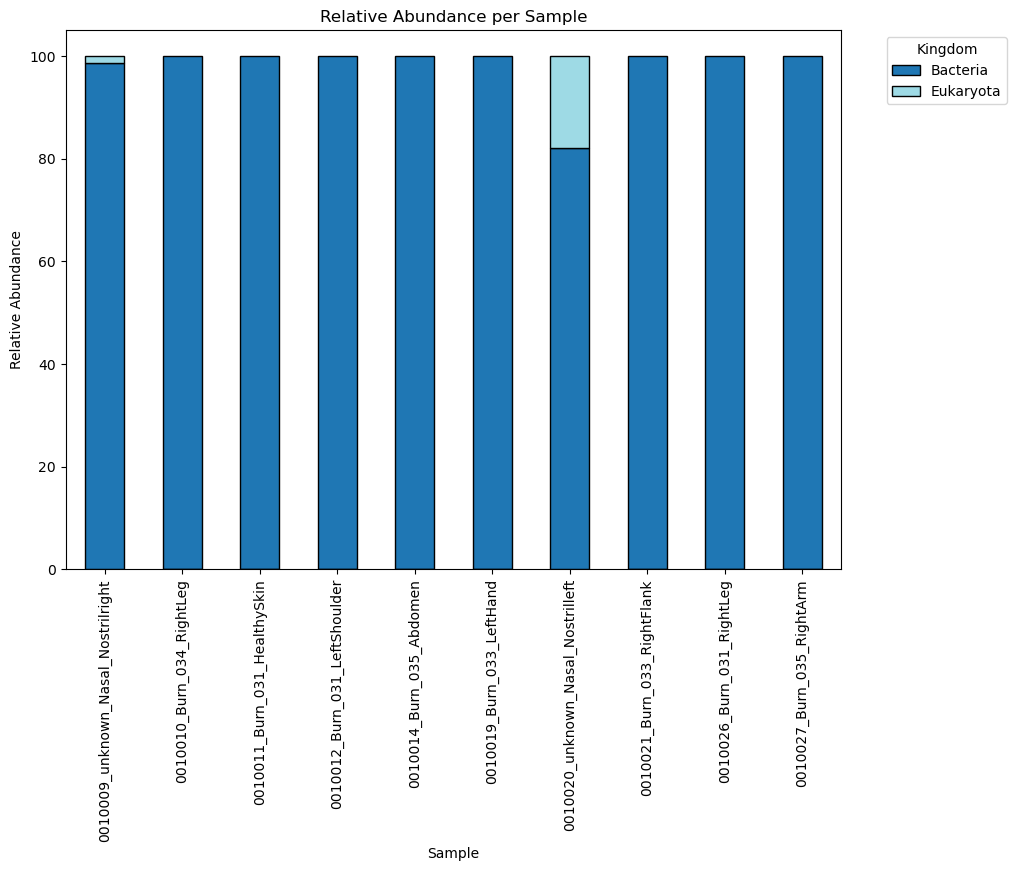

In [3]:
filtered_df = metaphlan_bowtie[metaphlan_bowtie["Kingdom"].isin(["Bacteria", "Eukaryota"]) & metaphlan_bowtie["Kingdom"].notnull() & (metaphlan_bowtie["estimated_number_of_reads_from_the_clade"] > 10) & (metaphlan_bowtie["relative_abundance"] > 0)]
filtered_df = filtered_df.groupby(['sample', "Kingdom"])['relative_abundance'].sum().reset_index()
filtered_df = filtered_df.pivot(index='sample', columns="Kingdom", values='relative_abundance')
filtered_df = filtered_df.apply(lambda row: 100. * row / row.sum(), axis=1)
filtered_df = filtered_df.fillna(0)

colormap = plt.get_cmap('tab20', len(filtered_df.columns))

# Plot
filtered_df.plot(kind='bar', stacked=True, figsize=(10,7), edgecolor='black', color=[colormap(i) for i in range(len(filtered_df.columns))])
plt.title('Relative Abundance per Sample')
plt.xlabel('Sample')
plt.ylabel('Relative Abundance')
plt.legend(title="Kingdom", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [4]:
def plot_relative_abundance_bacteria_metaphlan(df, column, min_reads):
    filtered_df = df[(df["Kingdom"] == "Bacteria") & (df[column].notnull()) & (df["estimated_number_of_reads_from_the_clade"] > min_reads) & (df["relative_abundance"] > 0)]
    
    # Aggregate the data
    filtered_df = filtered_df.groupby(['sample', column])['relative_abundance'].sum().reset_index()
    
    filtered_df = filtered_df.pivot(index='sample', columns=column, values='relative_abundance')
    filtered_df = filtered_df.apply(lambda row: 100. * row / row.sum(), axis=1)

    # Fill NaN values with 0
    filtered_df = filtered_df.fillna(0)

    # Create a colormap
    colormap = plt.get_cmap('tab20', len(filtered_df.columns))

    # Plot
    filtered_df.plot(kind='bar', stacked=True, figsize=(10,7), edgecolor='black', color=[colormap(i) for i in range(len(filtered_df.columns))])

    plt.title('Relative Abundance per Sample')
    plt.xlabel('Sample')
    plt.ylabel('Relative Abundance')
    plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

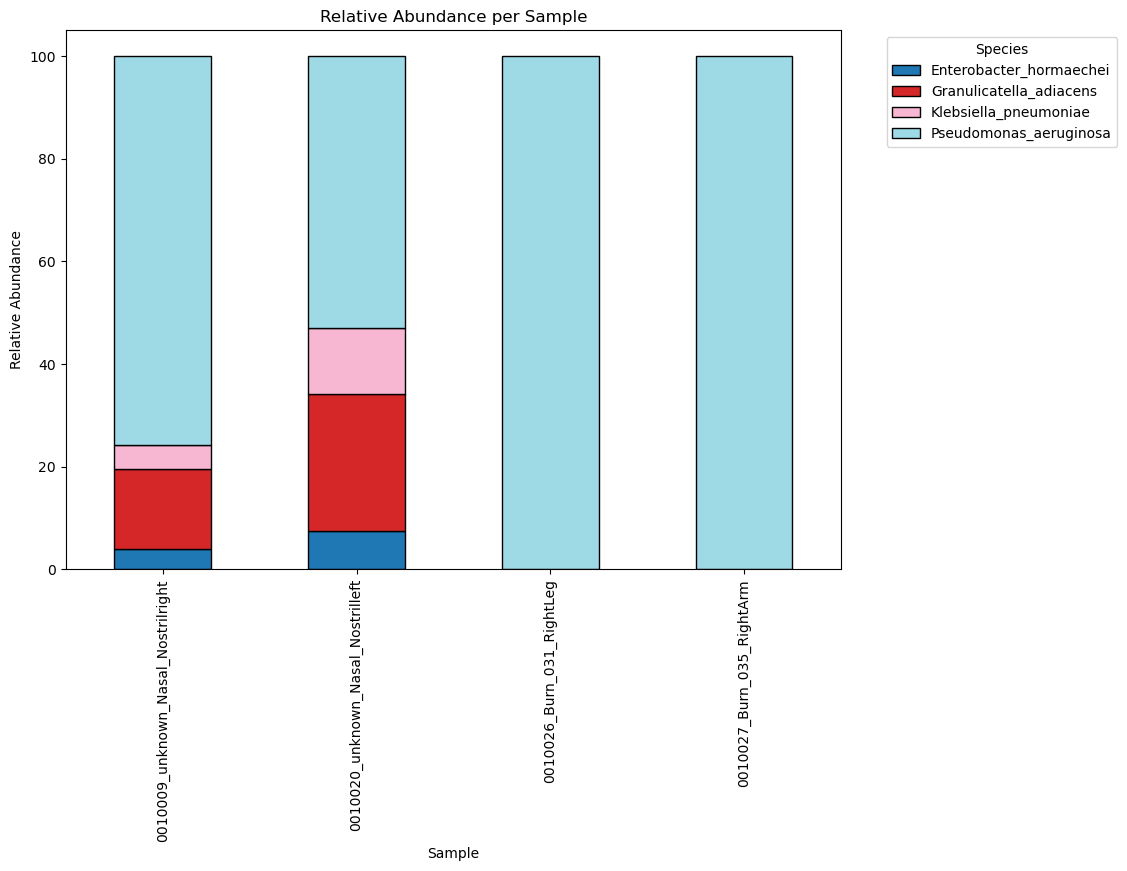

In [5]:
plot_relative_abundance_bacteria_metaphlan(metaphlan_bowtie, "Species", 10)

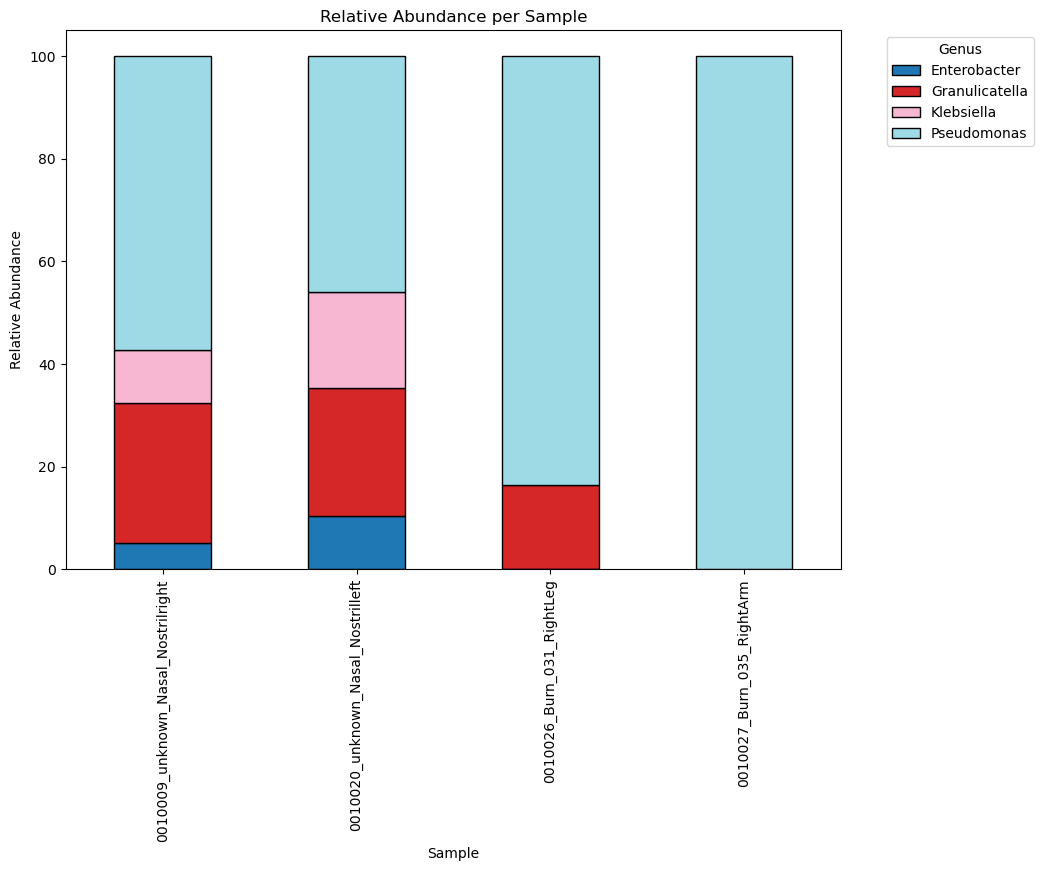

In [6]:
plot_relative_abundance_bacteria_metaphlan(metaphlan_bowtie, "Genus", 10)

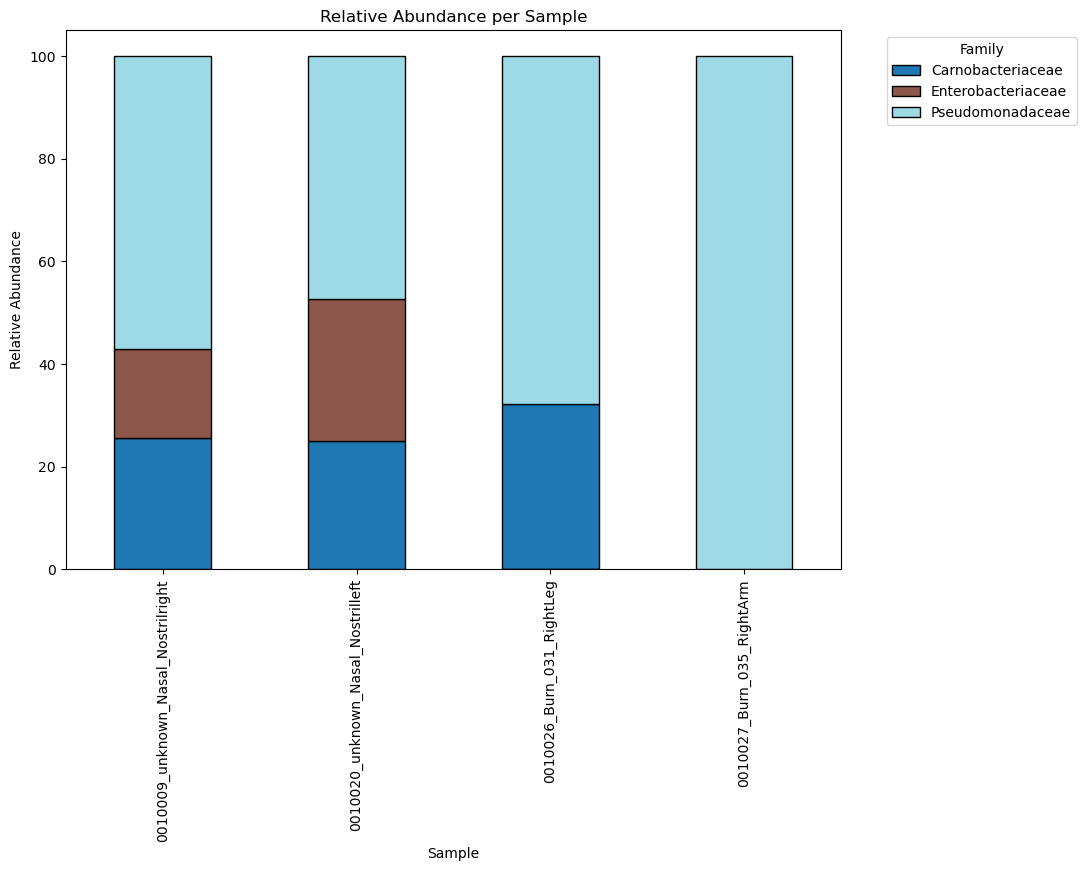

In [7]:
plot_relative_abundance_bacteria_metaphlan(metaphlan_bowtie, "Family", 10)

Text(0.5, 1.01, 'Species relative abundance (metaphlan)')

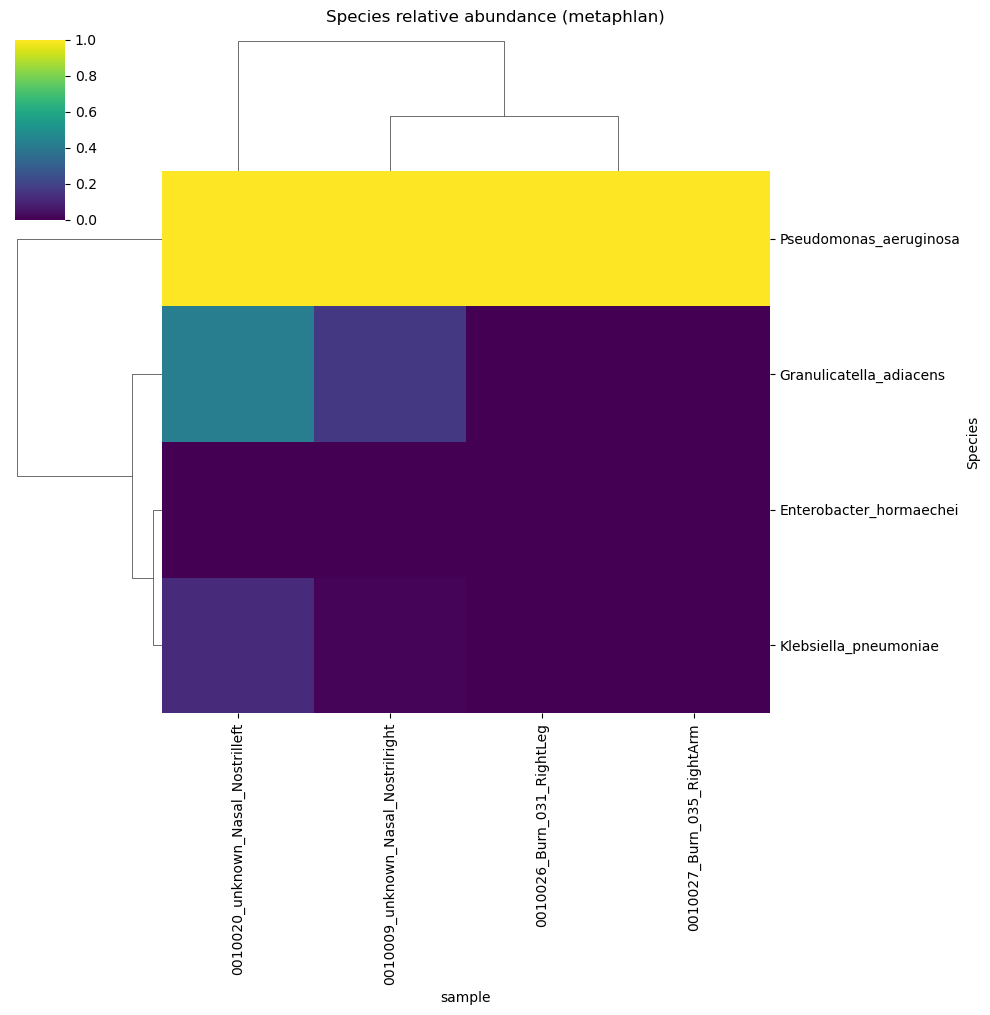

In [8]:
# Pivot the DataFrame
pivot_df = metaphlan_bowtie.pivot_table(index='Species', columns='sample', values='relative_abundance', aggfunc='sum')

# Replace NaN values with 0
pivot_df = pivot_df.fillna(0)

# Create the clustermap
g = sns.clustermap(pivot_df, cmap='viridis', standard_scale=1)

# Add a title
plt.suptitle('Species relative abundance (metaphlan)', y=1.01)